### Graph illustrations of hypothetical Kill Chain interactions

The following work is an appendix to the main file on [Kill Chain research, found here](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Alex/4%20-%20Kill%20Chain/1%20-%20Kill%20chain%20research.ipynb). This provides illustrations for each of the 5 Kill-Chain stages isolated in the process drawn from the main work. The interactions take place in the 'hypothetical examples' set at the end of each of the 5 stages. More precisely, every image depicts the first hypothetical scenario described under each stage. This appendix is used to provide visualisations of the Kill Chain's distribution and how an attacker operates from start to end, and all of the images can be found in our [main project write-up](https://www.overleaf.com/project/60e427e598083678d0a48fab).

We need the following graphing package:

In [3]:
# install.packages("igraph")
library(igraph)

We will highlight all of the 5 stages in order, starting from 'reconnaissance' and ending with 'actions on objective'.

##### 1. Reconnaissance

_"UserX conducts his activity from SourceCompA to DestCompB for a while, then attempts various logons that FAIL, from SourceCompA to DestCompC, DestCompD, DestCompE etc."_

* Red = Failed connections
** Blue = Successful connections

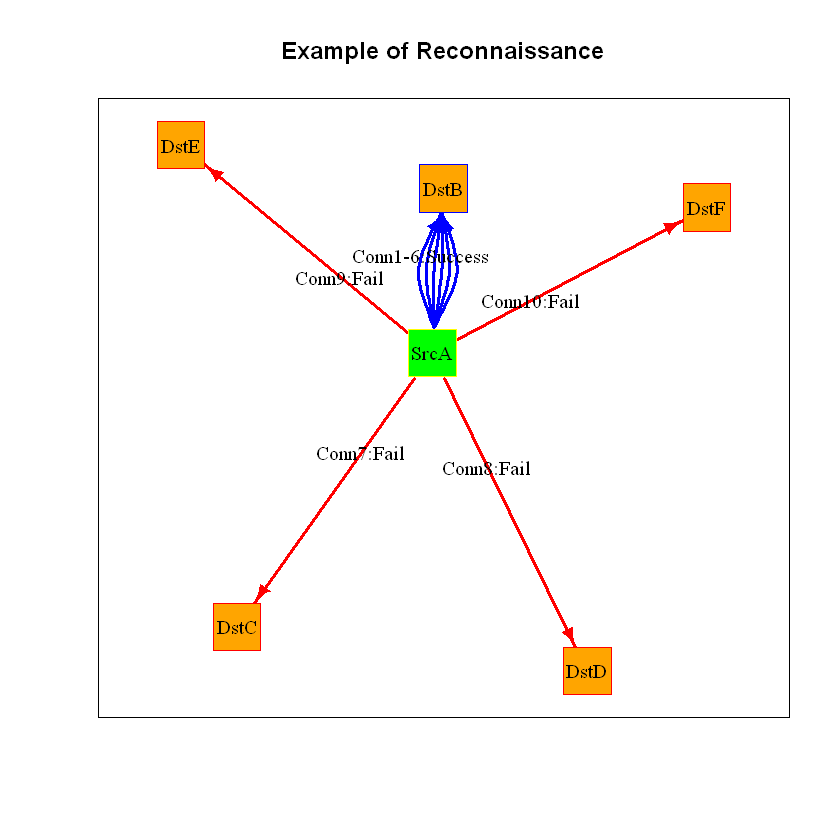

In [9]:
g<- graph(edges=c("SrcA","DstB", "SrcA","DstB", "SrcA","DstB", "SrcA","DstB", "SrcA","DstB", "SrcA","DstB",
                  "SrcA","DstC", "SrcA","DstD", "SrcA","DstE", "SrcA","DstF"))
V(g)$size <- 18
plot(g, edge.arrow.size=0.75, vertex.color=c("Green", rep("Orange", times=5)), edge.color=c(rep("Blue", 6), rep("Red", 4)),
    edge.width=2.5, edge.label=c(rep("", times=5),"Conn1-6:Success", "Conn7:Fail", "Conn8:Fail", "Conn9:Fail", "Conn10:Fail"), vertex.shape="square",
    main="Example of Reconnaissance", sub=cat("* Red = Failed connections\n** Blue = Successful connections"),
    vertex.frame.color=c("Yellow", "Blue", rep("Red", 4)), vertex.label.color="Black", frame=TRUE,
    edge.label.color="Black", edge.label.dist=10)

##### 2. Delivery

_"UserX has previously (likely days ago) attempted logon types from SrcDeviceA to DstDeviceB, DstDeviceC etc. and succeeded on DstDeviceF. Now, UserX suceeds in 'NetworkLogon' on DstDeviceF from SrcDeviceA again, then in 'TGS' and in 'WorkstationUnlock' on the same devices."_

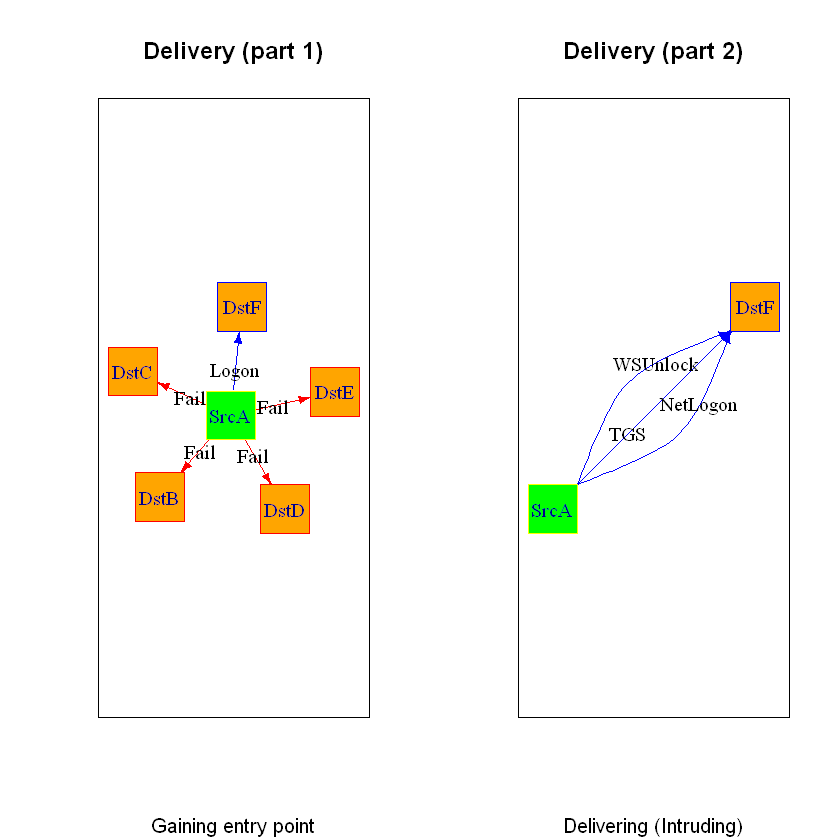

In [9]:
g1<- graph(edges=c("SrcA","DstB", "SrcA","DstC", "SrcA","DstD", "SrcA","DstE", "SrcA","DstF"))
g2<- graph(edges=c("SrcA","DstF", "SrcA","DstF", "SrcA","DstF"))
op<- par(mfrow=c(1,2))
V(g1)$size <- 48
V(g2)$size <- 48
plot(g1, vertex.shape="square", vertex.color=c("Green", rep("Orange", times=5)), edge.label=c(rep("Fail", 4), "Logon"),
    edge.label.color="Black", edge.color=c(rep("Red", 4), "Blue"), vertex.frame.color=c("Yellow", rep("Red", 4), "Blue"),
    edge.arrow.size=0.45, frame=TRUE, sub="Gaining entry point", main="Delivery (part 1)")
plot(g2, vertex.shape="square", vertex.color=c("Green", "Orange"), edge.label=c("NetLogon", "TGS", "WSUnlock"), 
    edge.label.color="Black", edge.color="Blue", vertex.frame.color=c("Yellow", "Blue"), edge.arrow.size=0.45, frame=TRUE, 
    sub="Delivering (Intruding)", main="Delivery (part 2)")
par(op)

##### 3. Privilege Escalation

_"UserX makes successful TGS requests within Authentication to one of the privileged usernames, such as EnterpriseAppServer, AppService, Scanner, Administrator etc., then runs ProcessA, ProcessB etc. within processes with destination source the same as in the Authentication case. (since they have the power to grant rights)"_

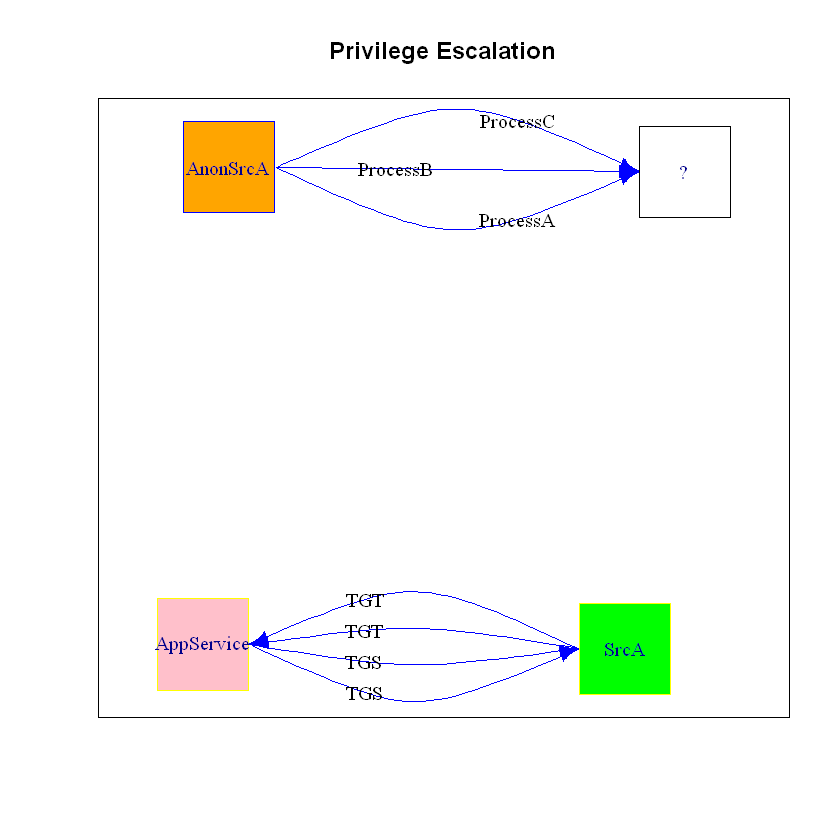

In [148]:
g1<- graph(edges=c("SrcA","AppService", "SrcA","AppService", "SrcA","AppService", "SrcA","AppService", 
                  "AnonSrcA","?", "AnonSrcA","?", "AnonSrcA","?"))
V(g1)$size <- 38
plot(g1, vertex.shape="square", vertex.color=c("Green","Pink", "Orange", "White"), edge.arrow.mode=c(2,2,1,1,2,2,2), edge.arrow.size=0.75,
    edge.color="Blue", edge.label=c("TGT", "TGT", "TGS", "TGS", "ProcessA", "ProcessB", "ProcessC"), frame=TRUE, edge.label.color="Black", 
    vertex.frame.color=c(rep("Yellow", 2), "Blue", "Black"), main="Privilege Escalation")

##### 4. Lateral Movement

_"UserX accesses DstDeviceB using SrcDeviceA to logon. Later, they access DstDeviceC using SrcDeviceB, i.e. the same device that they previously used to logon. This process is repeated several times, with actions in between within the Process dataset, where they run certain commands from those devices."_

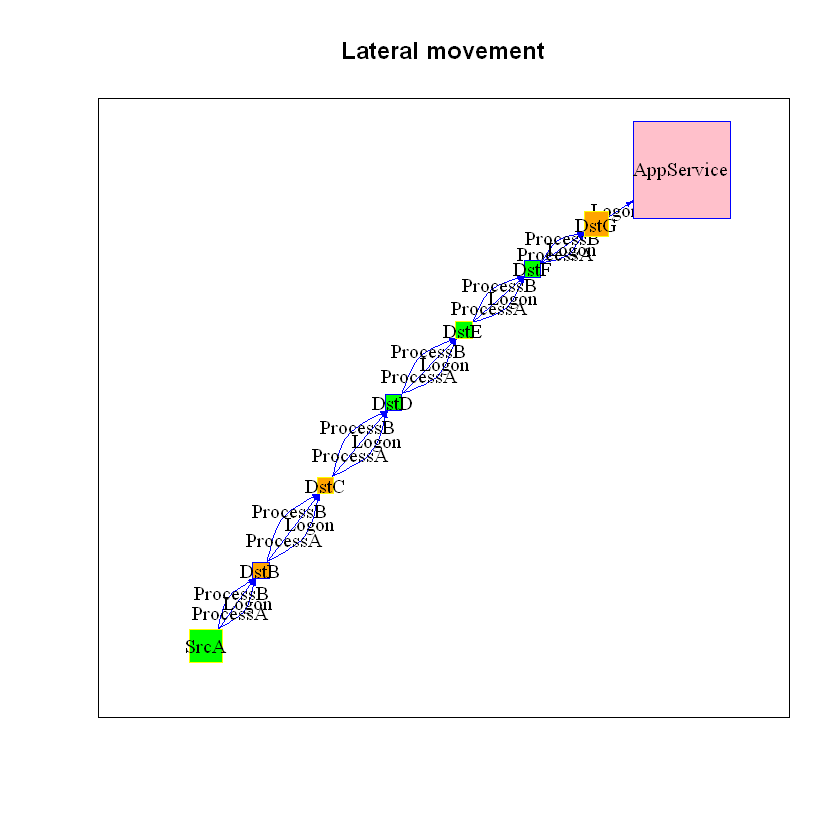

In [138]:
g1<- graph(edges=c("SrcA","DstB", "DstB","DstC", "DstC","DstD", "DstD","DstE", "DstE","DstF", "DstF","DstG", 
                  "SrcA","DstB", "DstB","DstC", "DstC","DstD", "DstD","DstE", "DstE","DstF", "DstF","DstG", 
                  "SrcA","DstB", "DstB","DstC", "DstC","DstD", "DstD","DstE", "DstE","DstF", "DstF","DstG", 
                  "DstG","AppService"))
deg <- degree(g1, mode="all")
V(g1)$size <- 41/deg
plot(g1, vertex.shape="square", vertex.color=c(sample(c("Green", "Orange"), size=7, replace=TRUE), "Pink"), edge.color="Blue", edge.label=c(rep("Logon", 6), rep("ProcessA", 6), rep("ProcessB", 6), "Logon"), 
    edge.label.color="Black", vertex.frame.color=c("Yellow", "Blue"), vertex.label.color="Black", edge.arrow.size=0.25, edge.label.dist = 35,
    frame=TRUE, main = "Lateral movement", margin=c(0,0,0,0), edge.width=1.5)

##### 5. Actions on Objectives

_"UserX uses SrcDeviceA which must be one of the privileged devices, 'AppService', 'Administrator' etc. to run a long series of Processes. These actions may or may not be doubled by 'TGS' AuthTypes within the Authetication data, or by 'WorkstationUnlock', 'Service' or other service granting authentication types."_

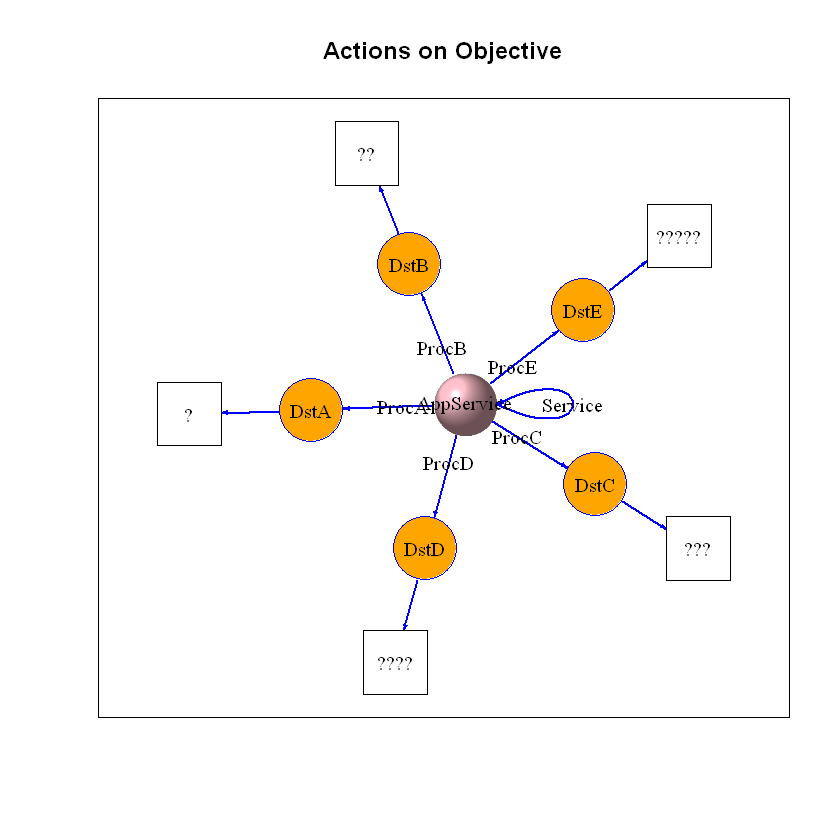

In [151]:
g1<- graph(edges=c("AppService","AppService", "AppService","DstA", "AppService","DstB", "AppService","DstC", "AppService","DstD", "AppService","DstE", 
                   "DstA","?", "DstB","??", "DstC","???", "DstD","????", "DstE","?????"))
V(g1)$size <- 25
plot(g1, vertex.shape=c("sphere", rep("circle", 5), rep("square", 5)), vertex.color=c("Pink", rep("Orange", 5), rep("White", 5)), edge.color="Blue", edge.arrow.size=0.25, 
    edge.label=c("Service", "ProcA", "ProcB", "ProcC", "ProcD", "ProcE"), edge.label.color="Black", vertex.label.color="Black", 
    vertex.frame.color=c("Yellow", rep("Blue", 5), rep("Black", 5)), frame=TRUE, main="Actions on Objective", edge.width=2)

**References**


[1. The five KC stages identified](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Alex/4%20-%20Kill%20Chain/1%20-%20Kill%20chain%20research.ipynb)


[2. Igraph documentation](https://cran.r-project.org/web/packages/igraph/igraph.pdf)


[3. Using igraph for networks visualisation](https://kateto.net/network-visualization)